In [3]:
from pathlib import Path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
csx_csv = Path('/Users/bcas/gw/projects/project2/Resources/stock_price_data/csx_prices.csv')
csx_prices = pd.read_csv(csx_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
csx_prices.head()
#Path.cwd()

,Close
Date,
1980-11-03 16:00:00,1.17
1980-11-05 16:00:00,1.18
1980-11-06 16:00:00,1.16
1980-11-07 16:00:00,1.15
1980-11-10 16:00:00,1.15


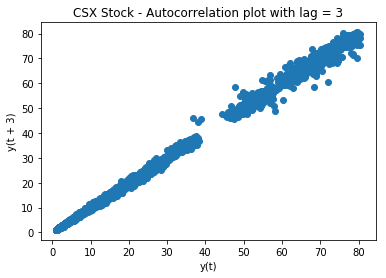

In [5]:
plt.figure()
lag_plot(csx_prices['Close'], lag=3)
plt.title('CSX Stock - Autocorrelation plot with lag = 3')
plt.show()

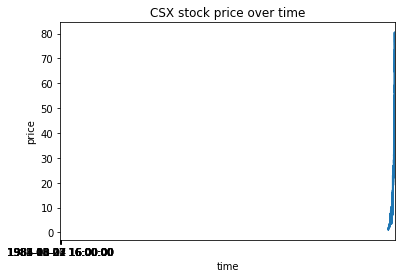

In [8]:
plt.plot(csx_prices.index, csx_prices["Close"])
plt.xticks(np.arange(0,1259, 200), csx_prices.index[0:1259:200])
plt.title("CSX stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [5]:
# 
train_data, test_data = csx_prices[0:int(len(csx_prices)*0.7)], csx_prices[int(len(csx_prices)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/Users/bcas/anaconda3/envs/algotrading/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 0.6048651328359106


In [6]:
model_pred.to_csv("model_predictions")

NameError: name 'model_pred' is not defined

In [ ]:
#CSX Price Predictions

csx_prices.loc["2014"].plot()
test_set_range = csx_prices[int(len(csx_prices)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('CSX Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), csx_prices.Date[881:1259:50])
plt.legend()
plt.show()

In [ ]:
csx_prices.loc["2014"].plot()

In [ ]:
model_pred.loc["2014"].plot()

In [ ]:
print(test_data)

In [ ]:
predictions=pd.DataFrame({"predictions":model_pred}, index=test_data.index)
predictions.head()

In [ ]:
print(model_predictions)
model_pred=model_predictions.reshape(len(model_predictions))
print(model_pred)

In [ ]:
len(model_predictions)

In [ ]:
model_predictions.shape

In [ ]:
model_pred=[x[0] for x in model_predictions]
print(model_pred)

In [ ]:
model_pred.loc["2014"].plot()

In [ ]:
predictions=pd.DataFrame({"predictions":model_predictions})

In [ ]:
predictions.to_csv("model_predictions")